Today we will be building more on last week's tutorial on xarrays by working with the Metpy package!

Metpy is a very useful package as it contains many meteorological calculations, unit conversions, and plotting schemes. Using it, we can calculate many variables that aren't provided in most datasets (such as frontogenesis, potential vorticity, etc) and create publication quality graphics using said data. Metpy is tightly interwoven with xarrays and uses xarrays for many of its processes. NOTE: At this time, xarrays do not work with every function as Metpy is still working on integrating them into the framework.

To start, we need to check and make sure we hae Metpy installed! We installed it the other week, so we should have it available!

In [2]:
import metpy

If there is no error output, congratulations! You can now move ahead as Metpy is working!

If there is an error saying it isn't installed, then enter this into the anaconda prompt: conda install -c conda-forge metpy

We are going to be working with the past couple of datasets, so make sure to have the air.mon.mean.nc file and 2004041400.nc file downloaded. We also later on will need to access another data file from the ERA-5 dataset, but more on that later!

Metpy has a lot of functionality for working with data. The biggest advantage it has over other packages is that it uses and transforms between meteorological units. Let's take a look at some examples:

In [3]:
#Import the units package from metpy
#Also import numpy just to have
import numpy as np
from metpy.units import units

#We have multiple ways to declare units in metpy

#The first way is to simply multiply a quantity by the units we are looking for.
length = 5 * units('m')

print(length)

#The second is to use the units.Quantity() function

length2 = units.Quantity(5,'meters')
print(length2)


5 meter
5 meter


When we print out both of the above variables, we see that the units get printed along with it! This is great to have for when we are calculating equations and functions to make sure all of our units match. Also, many functions in metpy calculate specific meteorological quantities, so they all use unit checks for the input variables to make sure that the proper values will be calculated!

This is also useful for any calculations we perform as the units will automatically be used in any math operations we perform. 

Let's look at this in depth with a physics example:

A wind is blowing at 20 meters/second and speeds up to 40 meters/second in 20 seconds. How far did an air parcel pushed by this wind travel in this time?

In [4]:
#We will be using a kinematic equation to solve this: D = vi*t + 0.5*((vf-vi)/t)*t^2
#D = distance traveled
#vi = initial velocity
#vf = final velocity
#t = time

vi = 20 * units('m/s')
vf = 40 * units('m/s')
t = 20 * units('sec')

d = vi * t + 0.5 * ((vf - vi)/t) * (t ** 2)
print('The initial velocity is: ',vi)
print('The final velocity is: ', vf)
print('The acceleration is: ', ((vf-vi)/t))
print('The distance travelled was: ', d)

The initial velocity is:  20.0 meter / second
The final velocity is:  40.0 meter / second
The acceleration is:  1.0 meter / second ** 2
The distance travelled was:  600.0 meter


We see that for calculations all the units were taken into account. This way we can keep track and make sure that the units match at the end of the calculation. In the above example, our speeds had units of meters/second, acceleration had units of meters/second^2, and the distance had units of meters, all of which looks correct!

Another helpful thing with metpy units is that we can easily convert between units using the .to() function. Remeber in the first week how we wrote this function:
    def fahrenheit(temp):
        f = (temp * (9/5)) + 32
        return f

Well with metpy, that is all done for us!

In [5]:
tempf = 80 * units('degF')
print(tempf)

tempc = tempf.to('degC')
print(round(tempc,2))

80 degF
26.67 degC


Now that we have seen the functionality of units, let's look at the gfs data from last week in Metpy.

In [6]:
import xarray as xr

ds = xr.open_mfdataset('/media/mariofire/4TBExternal1/gfsncfiles/2004041400.nc')
print(ds)

<xarray.Dataset>
Dimensions:  (lat2: 71, lon2: 99)
Dimensions without coordinates: lat2, lon2
Data variables:
    lat      (lat2) float32 dask.array<chunksize=(71,), meta=np.ndarray>
    lon      (lon2) float32 dask.array<chunksize=(99,), meta=np.ndarray>
    h500     (lat2, lon2) float64 dask.array<chunksize=(71, 99), meta=np.ndarray>
    h200     (lat2, lon2) float64 dask.array<chunksize=(71, 99), meta=np.ndarray>
    h250     (lat2, lon2) float64 dask.array<chunksize=(71, 99), meta=np.ndarray>
    mslp     (lat2, lon2) float64 dask.array<chunksize=(71, 99), meta=np.ndarray>
    w750     (lat2, lon2) float64 dask.array<chunksize=(71, 99), meta=np.ndarray>
    utop     (lat2, lon2) float64 dask.array<chunksize=(71, 99), meta=np.ndarray>
    vtop     (lat2, lon2) float64 dask.array<chunksize=(71, 99), meta=np.ndarray>
    ubot     (lat2, lon2) float64 dask.array<chunksize=(71, 99), meta=np.ndarray>
    vbot     (lat2, lon2) float64 dask.array<chunksize=(71, 99), meta=np.ndarray>
    iv

/home/mariofire/anaconda2/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: In xarray version 0.14 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  This is separate from the ipykernel package so we can avoid doing imports until
/home/mariofire/anaconda2/envs/python3/lib/python3.6/site-packages/xarray/backends/api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  from_openmfds=True,


So we have a lot of data again to work with this week. Let's look at h500 to start

In [7]:
#Pull out the h500 data and check the units
h500 = ds.h500
h500.metpy.units

1 <Unit('dimensionless')>

Looks like our data doesn't have any units! Let's fix that problem by adding some in

In [8]:
#We need to multiply the values in the xarray by the units we want
h500 = h500.values * units('hPa')
h500.units

<Unit('hectopascal')>

In [9]:
#Now let's grab the coordinates for the variable
#We notice above that the dimensions lat2 and lon2 have no coordinates! So lets add some
ds = ds.assign_coords(lon2 = ds.lon.values, lat2 = ds.lat.values)

#Metpy currently allows 4 coordinate types: x, y, time, and vertical

#Now let's grab them! There are two ways to do this

#First we can use metpy.coordinates
x = ds['h500'].metpy.coordinates('x')
print([coord.name for coord in (x)])

#Second, we can just use metpy.x, metpy.y, metpy.vertical, or metpy.time
y = ds['h500'].metpy.y
x = ds['h500'].metpy.x
print([coord.name for coord in (x,y)])

['lon2']
['lon2', 'lat2']


Now we have h500 heights and can plot them on a lat/lon grid! However, we also want to see the geostrophic wind at 500 hPa as well, so let's calculate it!

To do this, we need to use metpy's built in calculation functions. 

mpcalc.geostrophic_wind(heights, f, dx, dy)

The function above is what we will be using. It takes inputs of heights, coriolis parameter, dx and dy (the spacing between the grid). So we have the heights, now we need to calculate the grid spacing and the coriolis parameter! Luckily metpy has built in functions to help us

In [72]:
#Get the grid spacing
#First we need to make 2d arrays for the latitude and longitude. We will broadcast them together
#xr.broadcast takes dimensions that we have defined and puts them together (similar to numpy.meshgrid)
#NOTE: We have to do xr.broadcast outside of any metpy functions or it will not work.
lat, lon = xr.broadcast(y, x)
#Next, we need to find the projection that the data is in. We can use metpy's built in cartopy functions
#
#data_crs = ds['h500'].metpy.cartopy_crs
#
#HOWEVER, the dataset I provided does not have this data.......it is GFS data that's already been interpolated 
#to a lat/lon grid so we can ignore the above step for now
#
#Now import the metpy calculation module
import metpy.calc as mpcalc
import cartopy.crs as ccrs
#
#Now we plug it into the equation below
dx, dy = mpcalc.lat_lon_grid_deltas(lon,lat)

#Now use the built in coriolis function
f = mpcalc.coriolis_parameter(np.deg2rad(lat))

#Now plug it all into the geostrophic wind equation. We need to convert the 500 hPa wind to meters so remove
#The units by dividing by hpa and multiply by 10 and units.m since we are in decameters (since hPa and decameters
#can relatively be interchanged)
u_geo, v_geo = mpcalc.geostrophic_wind(h500/units.hPa * 10 * units('m'), f, dx,dy, dim_order='yx')
print(u_geo)

[[17.26111948 19.72924912 22.32330025 ...  0.17838248  0.2719445   0.33848032] [14.67714895 16.11563556 17.45439181 ...  0.86827074  0.71205426   0.58207523] [12.42491676 13.56155246 14.59559018 ...  1.19219636  0.96702677   0.76844617] ... [11.764643   12.548429   13.08566533 ... 19.27739325 18.94021224  18.46954014] [12.59423378 13.37049254 13.66631266 ... 19.7936913  19.70603989  19.27756808] [12.83418397 13.0463922  13.42883218 ... 19.57231634 19.52051552  19.58579875]] meter / second


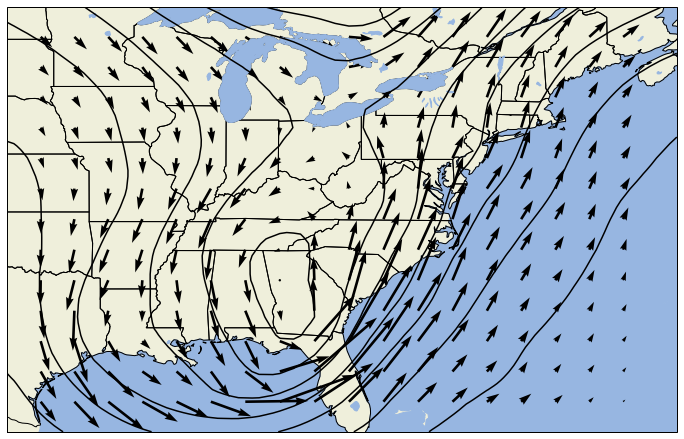

In [73]:
#Now let's plot the data!

import matplotlib.pyplot as plt
import cartopy.feature as cfeature

# Create the matplotlib figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})

# Plot winds, but not all of them
wind_slice = slice(5, -5, 5)
ax.quiver(lon[wind_slice,wind_slice], lat[wind_slice,wind_slice],
         u_geo[wind_slice,wind_slice],
         v_geo[wind_slice,wind_slice],)

# Plot heights and temperature as contours
h_contour = ax.contour(lon, lat, h500, colors='k', levels=range(500, 600, 6),transform=ccrs.PlateCarree())

# Add geographic features
ax.add_feature(cfeature.LAND.with_scale('50m'))
ax.add_feature(cfeature.OCEAN.with_scale('50m'))
ax.add_feature(cfeature.STATES.with_scale('50m'))
ax.add_feature(cfeature.LAKES.with_scale('50m'))



The above map shows the data we interpolated! 

Metpy is very useful to calculate variables we do not have in our current dataset and also to interpolate variables to new pressure levels. We will cover interpolation more in the coming weeks. 